# IMDB Binary Classification
From Deep Learning with Python, Chapter 3

The IMDB dataset is a set of 50K highly polarized film reviews from IMDB split into 25K training reviews and 25K testing reviews. The aim of this notebook is to learn how to classify film reviews as positive or negative based on the text of the reviews.

The IMDB dataset has already been processed so that the text of each review is represented by a sequence of integers. Each integer is an index into a dictionary of words. In this notebook we will use a dictionary of the 10K most frequent words.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print("train_data:", train_data.ndim, train_data.shape, train_data.dtype)
print("train_labels:", train_labels.ndim, train_labels.shape, train_labels.dtype)

train_data: 1 (25000,) object
train_labels: 1 (25000,) int64


In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


We can easily decode the reviews back into words

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = [reverse_word_index.get(i-3, '?') for i in train_data[0]]
print(' '.join(decoded_review))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Vectorize the Data
Convert the sequences of integers into one-hot encoded vectors i.e. 10K vectors with the indexes corresponding to the integer value of the words set to 1.

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
print("x_train:", x_train.ndim, x_train.shape, x_train.dtype)

x_train: 2 (25000, 10000) float64


In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
print("y_train:", y_train.ndim, y_train.shape, y_train.dtype)

y_train: 1 (25000,) float32


## Build the Model
Without activation functions to introduce non-linearity, a dense layer would consist of linear operatons and the network would only be able to learn linear (affine) transformations

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

#### Custom optimizer, loss, metrics
Standard values for these functions can be passed as strings but it is also possible to pass in function objects directly:

        from keras import optimizers
        from keras import losses
        from keras import metrics
        
        model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.binary_accuracy])


## Validating Your Approach
In order to monitor the accuracy of the model during training, we create a validation set by taking 10K samples from the original data. This allows us to check the model's accuracy against data that it has not been traing on.

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training Your Model
The call to ```model.fit()``` returns a ```History``` object which contains a ```history``` member which contains data about everything that happened during training.

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.5084 - acc: 0.7819 - val_loss: 0.3788 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.3002 - acc: 0.9047 - val_loss: 0.3000 - val_acc: 0.8901
Epoch 3/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.2178 - acc: 0.9285 - val_loss: 0.3084 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8837
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1425 - acc: 0.9544 - val_loss: 0.2850 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3169 - val_acc: 0.8779
Epoch 7/20
15000/15000 [==============================] - 1s 71us/step - loss: 0.0979 - acc: 0.9708 - val_loss: 0.3128 - val_ac

In [13]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Plotting the Trainging and Validation Loss

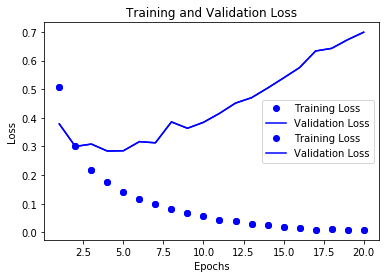

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting the Training and Validation Accuracy

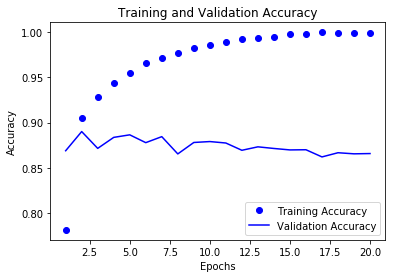

In [17]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The training loss decreases as the number of epochs increases but the validation loss starts to climb again after two or three epochs. This is a good indication of over-fitting (i.e. learning the training data) and your model will produce better results if you stop training after three epochs.

## Retraining the Model from Scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.4751 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.2655 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.1983 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


In [19]:
print(results)
print("accuracy:", results[1]*100)

[0.32138547925949096, 0.87368]
accuracy: 87.368


## Using the Model to Generate Predictions on New Data

In [20]:
model.predict(x_test[:10])

array([[0.13946252],
       [0.99969923],
       [0.31367597],
       [0.6604992 ],
       [0.92704135],
       [0.6697483 ],
       [0.99822325],
       [0.00688338],
       [0.9389492 ],
       [0.9863129 ]], dtype=float32)